In [ ]:
import croparray as ca
# ca1 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True)

In [ ]:
ca1 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/FCS_data/20250826_FCS/DataAnalysis/Cell02.nc", as_object=True)

In [ ]:
ca2 = ca.open_croparray(
    "/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/WT_XBP1/20251217_FCS/WT/DataAnalysis/Cell01.nc", as_object=True)

In [ ]:
ca3 = ca.open_croparray("/mnt/tsnas2/galindo/1_Imaging_Data/2_Comparing_Translation_methods/12xST_KDM5B/XBP1/SA_XBP1/DataAnalysis/Cell01.nc", as_object=True)

In [ ]:
cas = ca.concat(cas=[ca1,ca2,ca3], dim="Exp", labels =["no pause","wt-XBP1", "SA-XBP1"],join="outer");

In [9]:
cas

CropArray(ds=<xarray.Dataset> Size: 3GB
Dimensions:    (Exp: 3, fov: 1, n: 70, t: 1100, z: 5, y: 15, x: 15, ch: 1)
Coordinates:
  * t          (t) int32 4kB 0 1 2 3 4 5 6 ... 1094 1095 1096 1097 1098 1099
  * n          (n) int16 140B 0 1 2 3 4 5 6 7 8 9 ... 61 62 63 64 65 66 67 68 69
  * y          (y) int32 60B -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7
  * x          (x) int32 60B -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7
  * z          (z) int32 20B 0 1 2 3 4
  * fov        (fov) int32 4B 0
  * ch         (ch) int32 4B 0
  * Exp        (Exp) <U8 96B 'no pause' 'wt-XBP1' 'SA-XBP1'
Data variables: (12/13)
    int        (Exp, fov, n, t, z, y, x, ch) float64 2GB 983.0 1.325e+03 ... nan
    xc         (Exp, fov, n, t, ch) float64 2MB 250.0 250.0 247.0 ... 0.0 0.0
    yc         (Exp, fov, n, t, ch) float64 2MB 168.0 167.0 166.0 ... 0.0 0.0
    id         (Exp, fov, n, t) float64 2MB 16.0 16.0 16.0 16.0 ... 0.0 0.0 0.0
    signal_tp  (Exp, fov, n, t) float64 2MB 1.178e+05 1.122e+05 ... 0.0 0.0
    zc         (Exp, fov, n, t) float64 2MB 1.0 1.0 1.0 2.0 ... 0.0 0.0 0.0 0.0
    ...         ...
    signal     (Exp, ch, fov, n, t) float64 2MB 1.296e+03 1.108e+03 ... 0.0 0.0
    dx         (Exp) int32 12B 1 1 1
    dy         (Exp) int32 12B 1 1 1
    dz         (Exp) int32 12B 1 1 1
    dt         (Exp) int32 12B 1 1 1
    xy_pad     (Exp) int32 12B 7 7 7
Attributes:
    name:     video_filename
    date:     video_date)

In [95]:
ca1.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [40]:
ca2.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [41]:
ca3.ops.apply(ca.tools.binarize_crop_manual, channels=[0], source="best_z", out_name="ch{ch}_mask_manual", func_kwargs=dict(q=0.45, q_range=(0.02, 0.999), q_positive_only=True, close_px=1, smooth_px=0, fill_holes=False, return_uint8=True), compute_sum_xy=True, sum_name="{out}_area_px");

In [96]:
ca1.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [43]:
ca2.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [44]:
ca3.measure.mask_props(source="ch0_mask_manual", props=("major_axis_length_px","eccentricity","solidity"));

In [97]:
ca1.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [46]:
ca2.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [47]:
ca3.measure.mask_skeleton_length(source="ch0_mask_manual",out_prefix="ch0_mask_manual",method="longest_path");

In [98]:
ecc1 = ca1.ds["ch0_mask_manual__major_axis_length_px"]
{"mean":   ecc1.mean().item(),"median": ecc1.median().item(),"std": ecc1.std().item(),}

{'mean': 4.192541466546745, 'median': 4.0, 'std': 1.1065566936758124}

In [99]:
ecc2 = ca2.ds["ch0_mask_manual__major_axis_length_px"]
{"mean":   ecc2.mean().item(), "median": ecc2.median().item(),"std":    ecc2.std().item(),}

{'mean': 4.53360974252894,
 'median': 4.310955075242312,
 'std': 1.2601042491492882}

In [120]:
ca3

CropArray(ds=<xarray.Dataset> Size: 370MB
Dimensions:                                    (t: 1100, n: 70, y: 15, x: 15,
                                                z: 3, fov: 1, ch: 1)
Coordinates:
  * t                                          (t) int32 4kB 0 1 2 ... 1098 1099
  * n                                          (n) int16 140B 0 1 2 ... 67 68 69
  * y                                          (y) int32 60B -7 -6 -5 ... 5 6 7
  * x                                          (x) int32 60B -7 -6 -5 ... 5 6 7
  * z                                          (z) int32 12B 0 1 2
  * fov                                        (fov) int32 4B 0
  * ch                                         (ch) int32 4B 0
Data variables: (12/19)
    int                                        (fov, n, t, z, y, x, ch) int32 208MB ...
    xc                                         (fov, n, t, ch) int32 308kB 12...
    yc                                         (fov, n, t, ch) int32 308kB 29...
    id                                         (fov, n, t) float64 616kB 3.0 ...
    signal_tp                                  (fov, n, t) float64 616kB 4.49...
    zc                                         (fov, n, t) int32 308kB 2 2 ... 0
    ...                                         ...
    ch0_mask_manual                            (fov, n, t, x, y) uint8 17MB 0...
    ch0_mask_manual_area_px                    (fov, n, t) uint64 616kB 14 ... 0
    ch0_mask_manual__eccentricity              (fov, n, t) float64 616kB 0.78...
    ch0_mask_manual__solidity                  (fov, n, t) float64 616kB 0.93...
    ch0_mask_manual__major_axis_length_px      (fov, n, t) float64 616kB 5.32...
    ch0_mask_manual__skeleton_longest_path_px  (fov, n, t) float64 616kB 2.41...
Attributes:
    name:     video_filename
    date:     video_date)

In [121]:
ca3.df.variables_to_df(var_names=["ch0_mask_manual__major_axis_length_px"])

,fov,n,t,ch0_mask_manual__major_axis_length_px
0,0,0,0,5.325521
1,0,0,1,3.885753
2,0,0,2,4.346130
3,0,0,3,4.949700
4,0,0,4,3.813850
...,...,...,...,...
76995,0,69,1095,NaN
76996,0,69,1096,NaN
76997,0,69,1097,NaN
76998,0,69,1098,NaN


In [100]:
ecc3 = ca3.ds["ch0_mask_manual__major_axis_length_px"]
{"mean":   ecc3.mean().item(),"median": ecc3.median().item(),"std":    ecc3.std().item(),}

{'mean': 5.466515355977193,
 'median': 5.076029330140736,
 'std': 1.7666741118383653}

In [101]:
ta1 = ca.crop_array_tools.track_array(ca1, as_object=True)
ta2 = ca.crop_array_tools.track_array(ca2, as_object=True)
ta3 = ca.crop_array_tools.track_array(ca3, as_object=True)

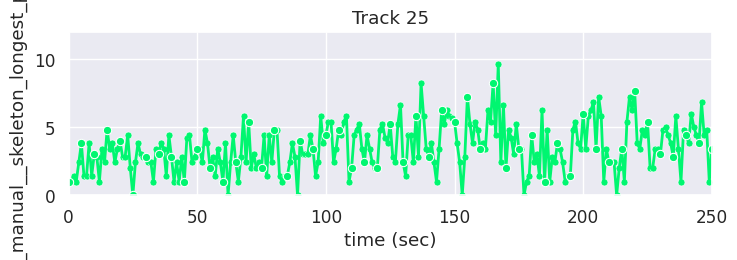

In [52]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__skeleton_longest_path_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

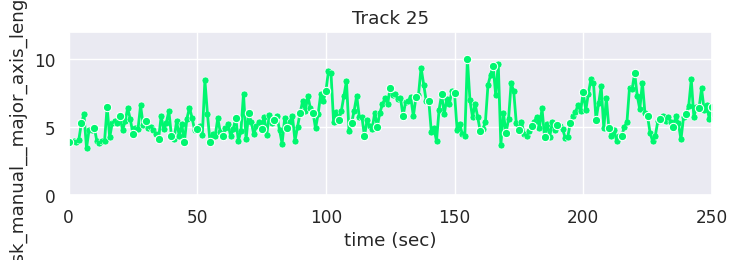

In [53]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

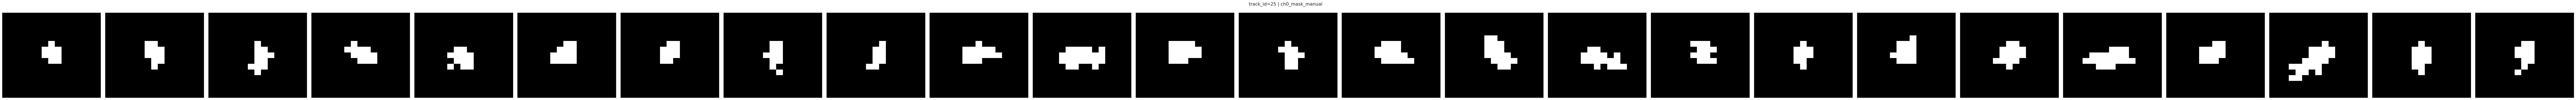

In [54]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual", track_id=[25], t=(0, 250, 10));

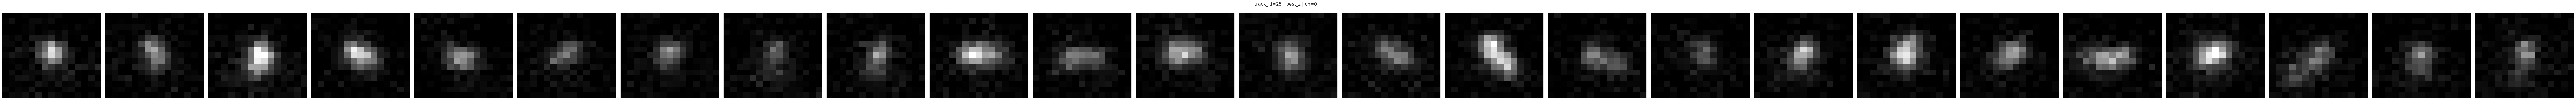

In [55]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[25], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

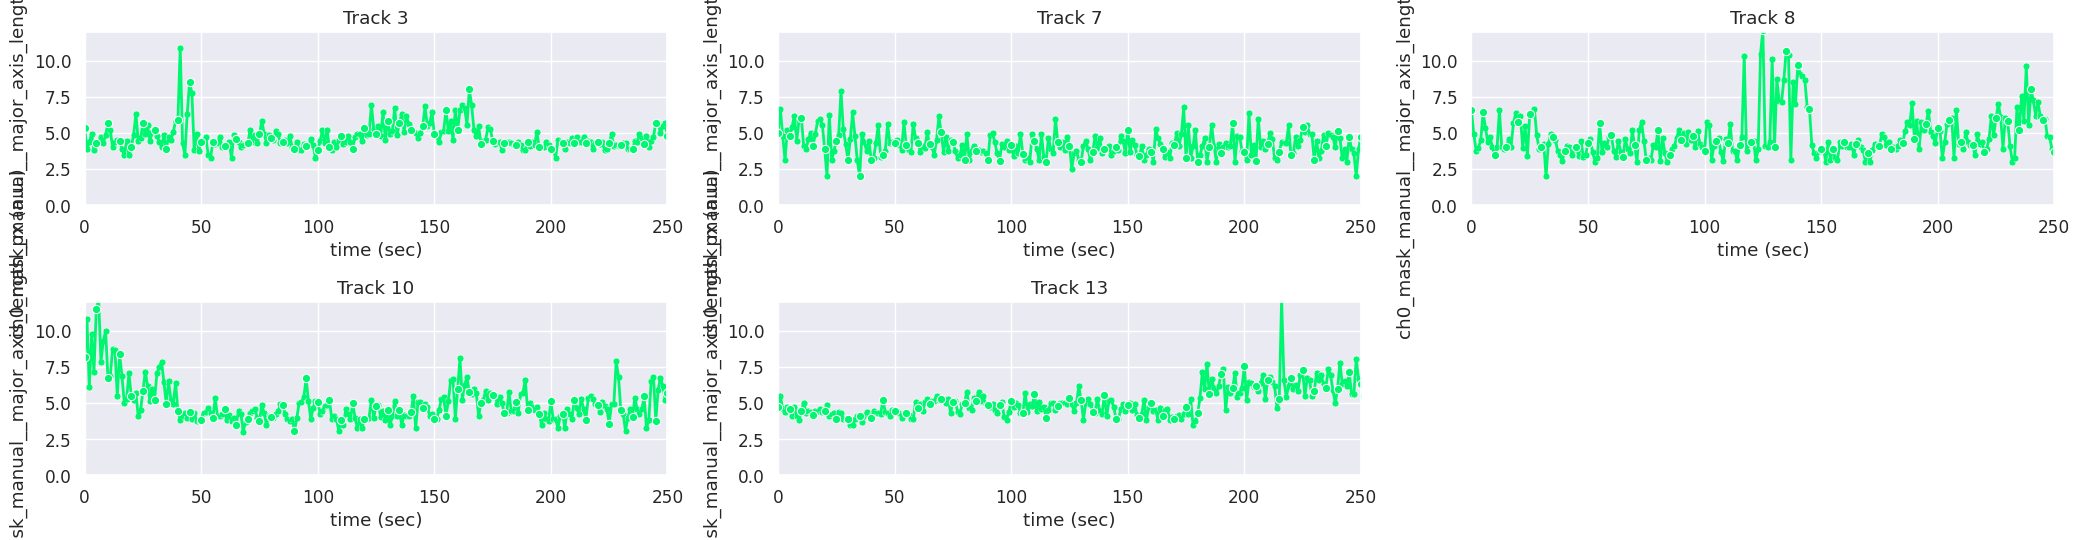

In [108]:
ta3.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[3,7,8,10,13],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

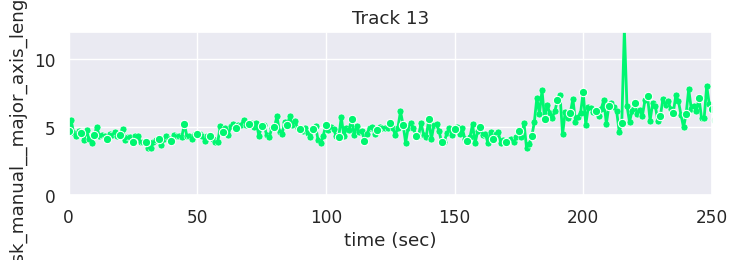

In [112]:
ta3.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[13],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

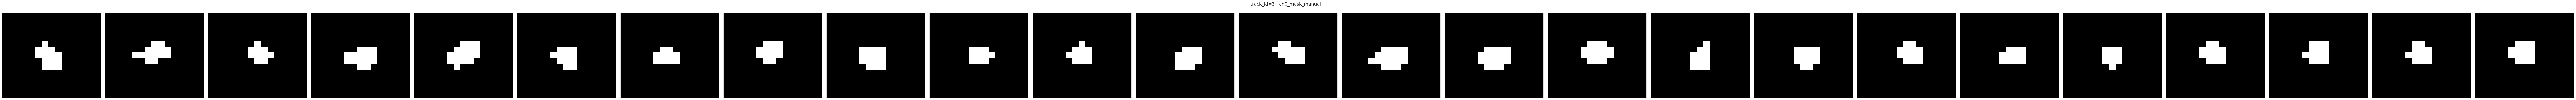

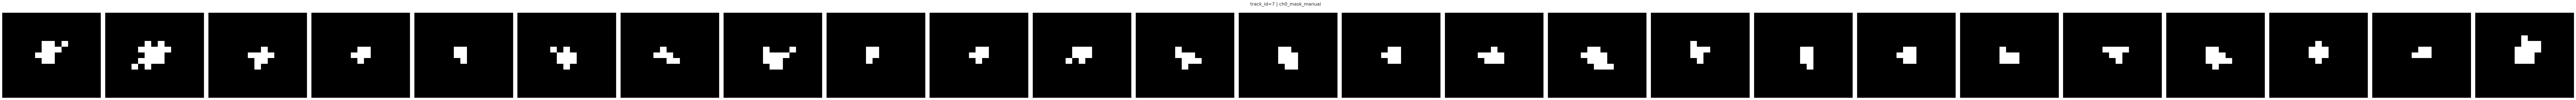

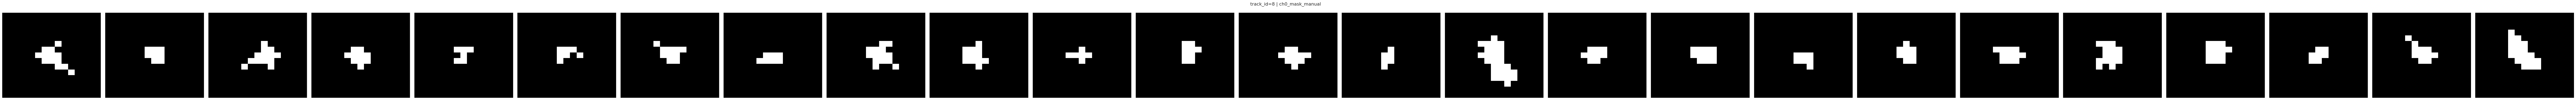

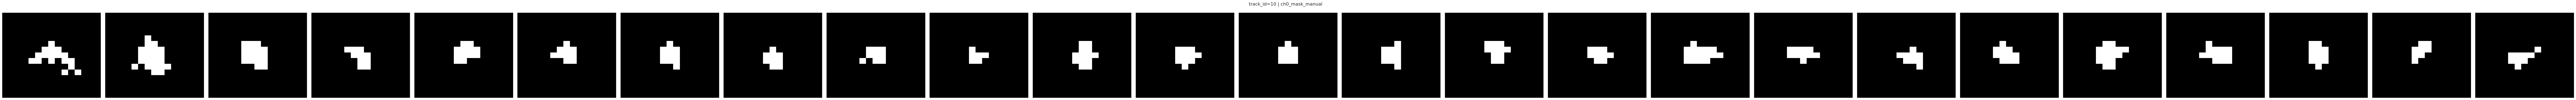

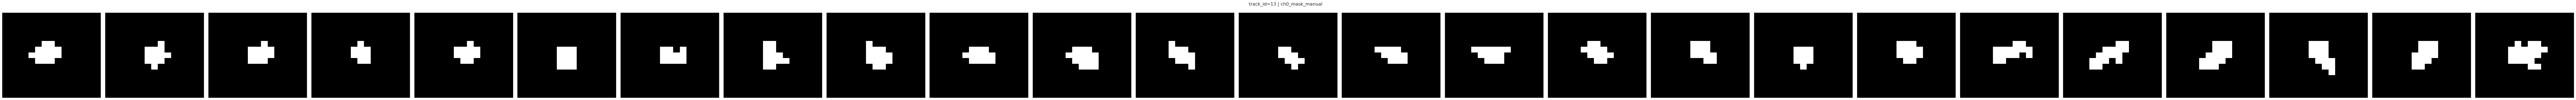

In [57]:
ta3.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

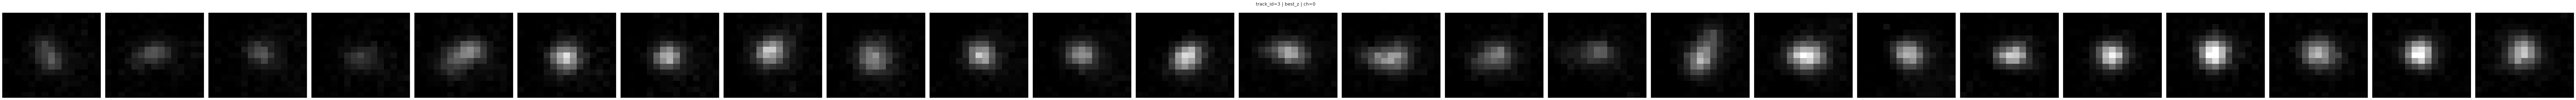

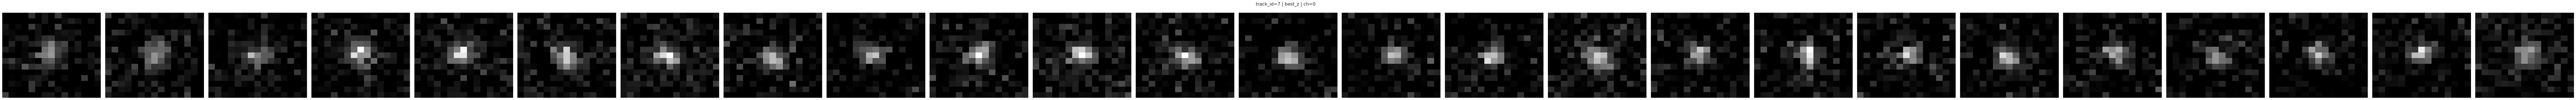

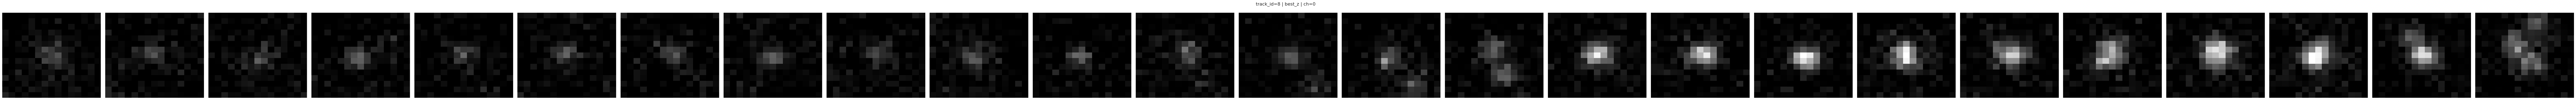

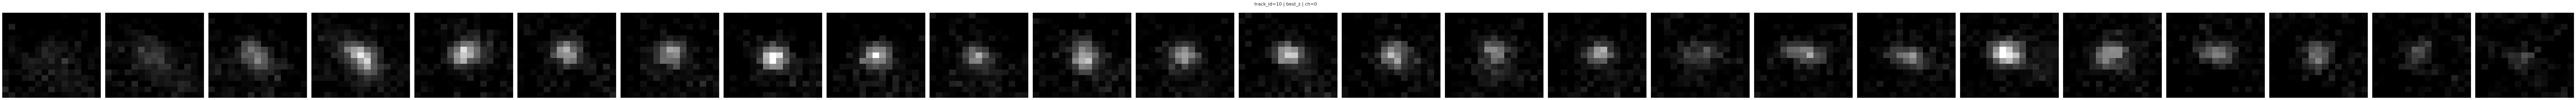

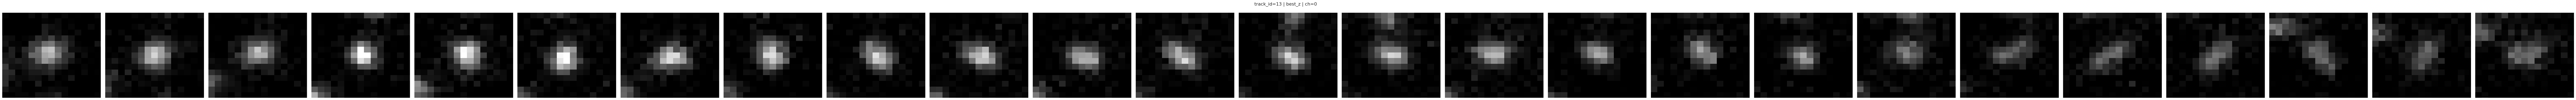

In [58]:
ta3.tplot.plot_trackarray_crops(fov=0, track_id=[3,7,8,10,13], t=(0, 250, 10), rolling=0, quantile_range=(0.02, 0.999));

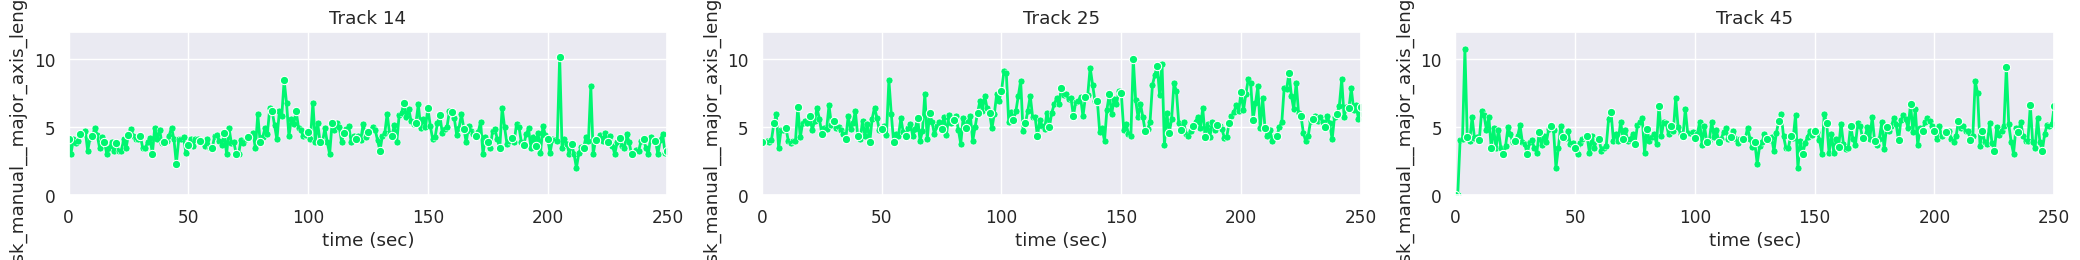

In [ ]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[14,25,45],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

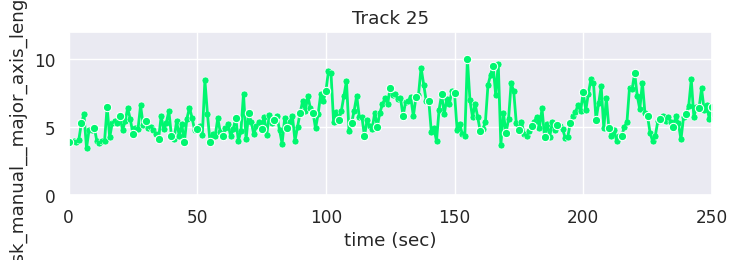

In [115]:
ta2.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[25],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

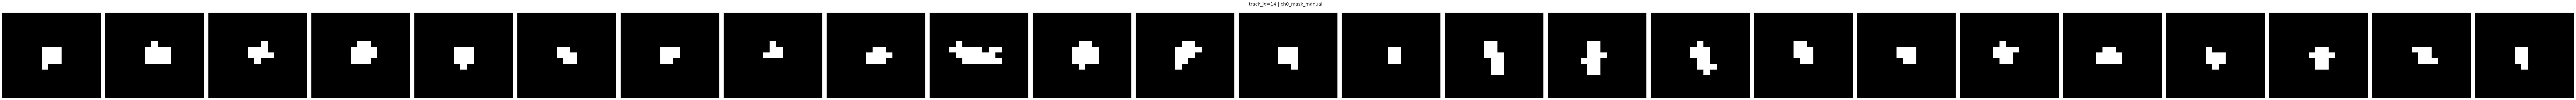

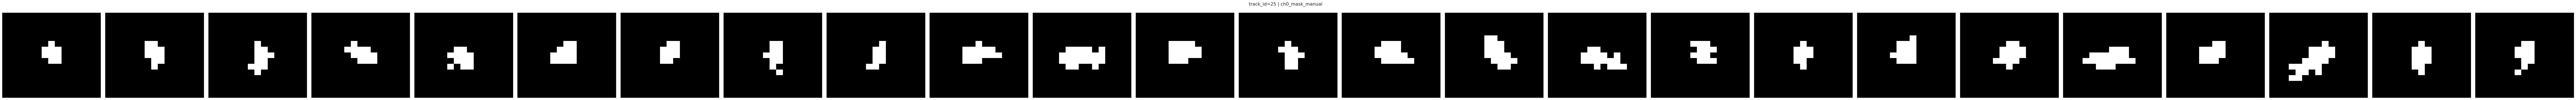

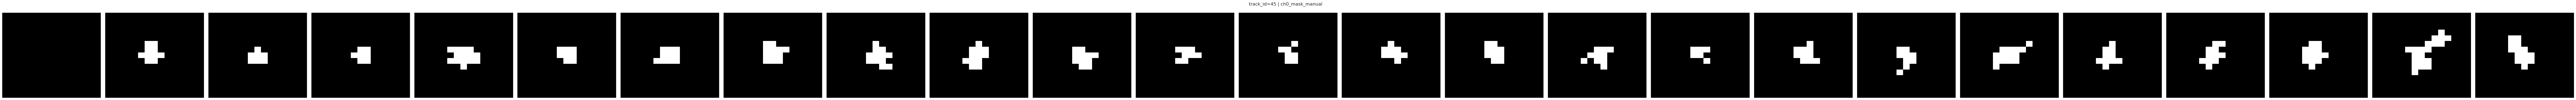

In [60]:
ta2.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

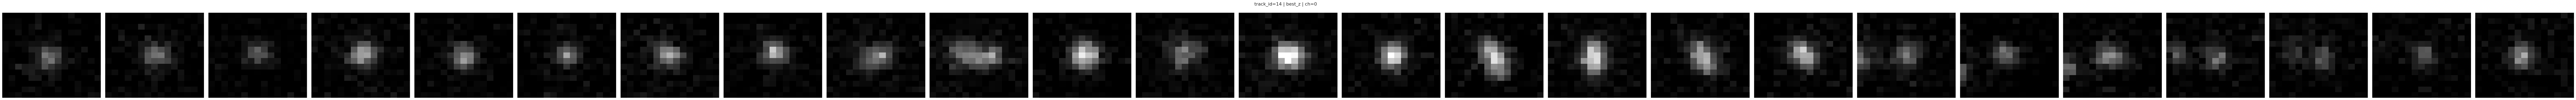

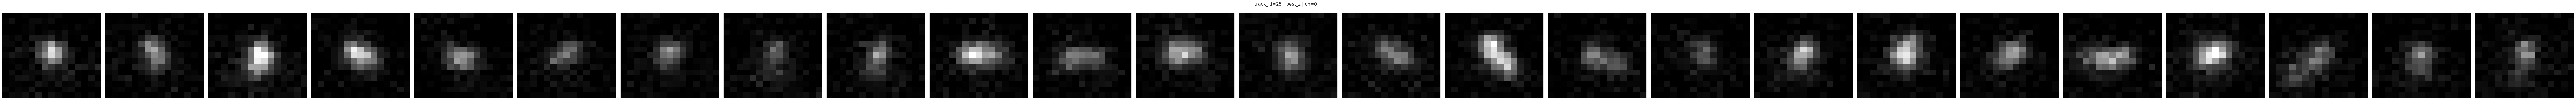

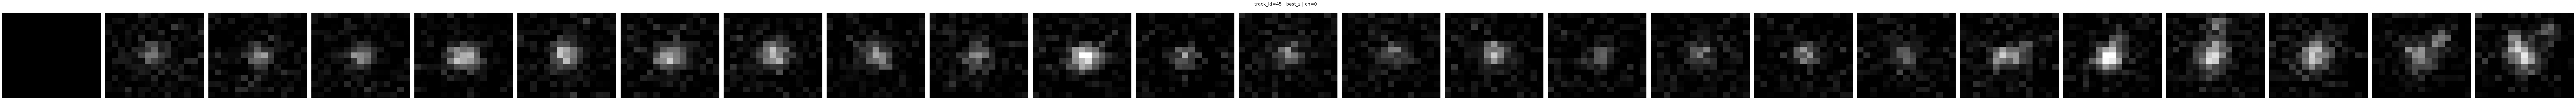

In [61]:
ta2.tplot.plot_trackarray_crops(fov=0, track_id=[14,25,45], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

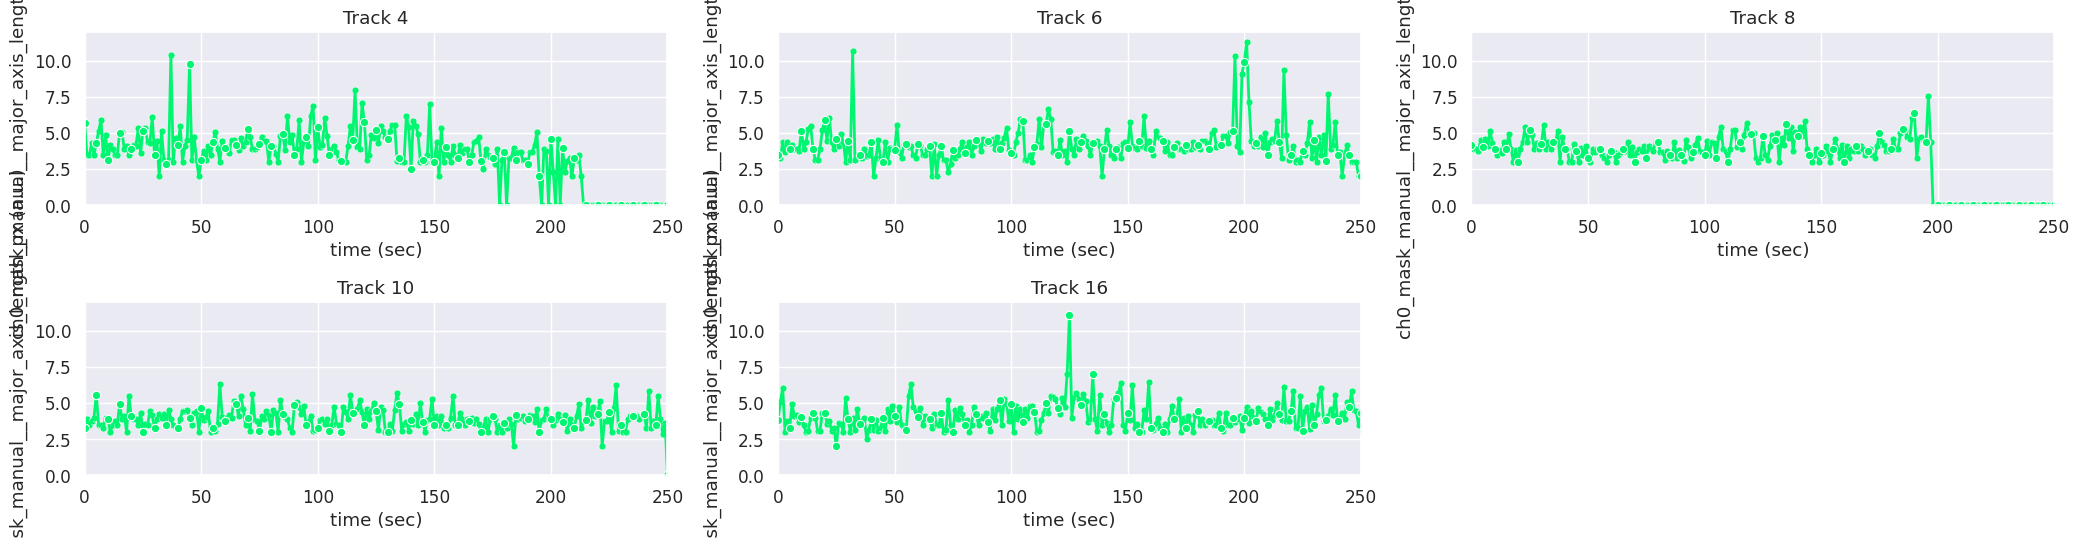

In [111]:
ta1.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[4,6,8,10,16],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

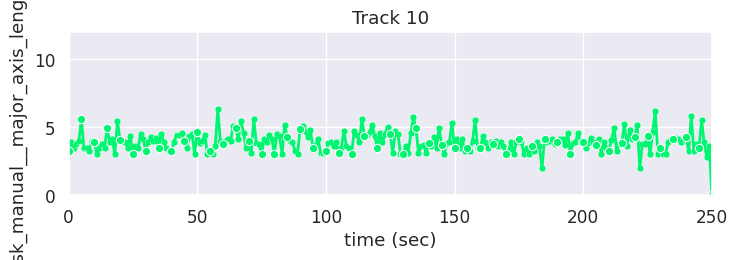

In [116]:
ta1.tplot.plot_track_signal_traces(var="ch0_mask_manual__major_axis_length_px",track_ids=[10],xlim=(0,250),rgb=(1,1,1),ylim=(0,12))

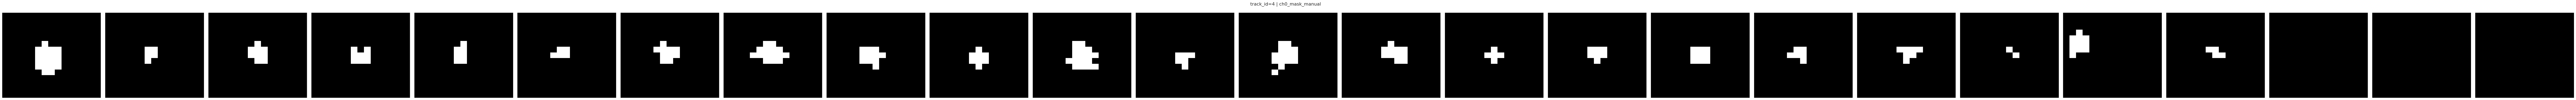

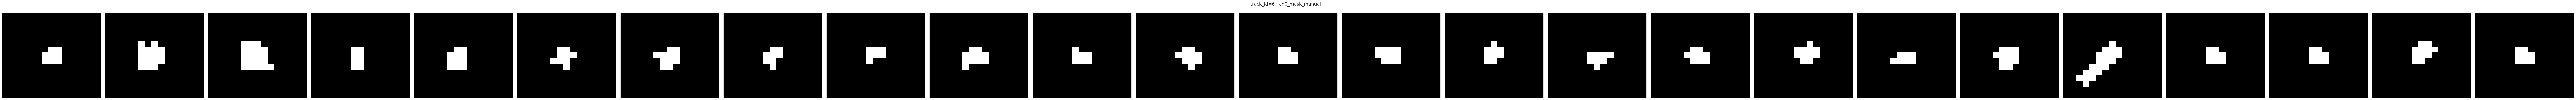

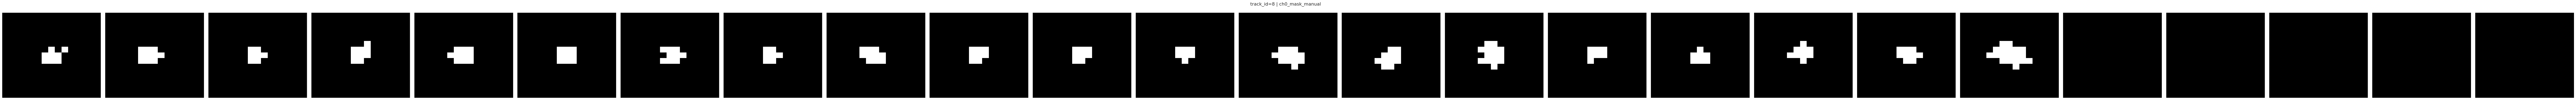

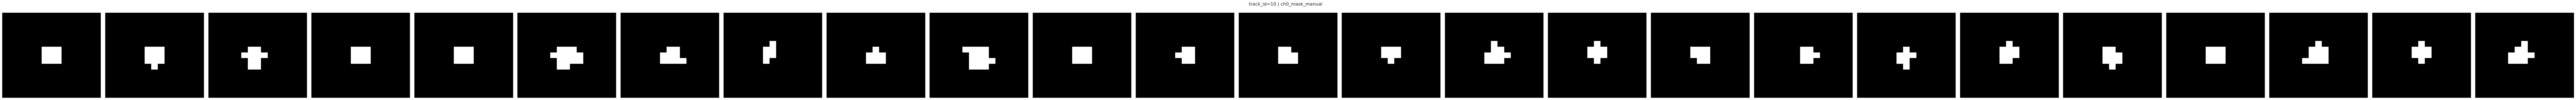

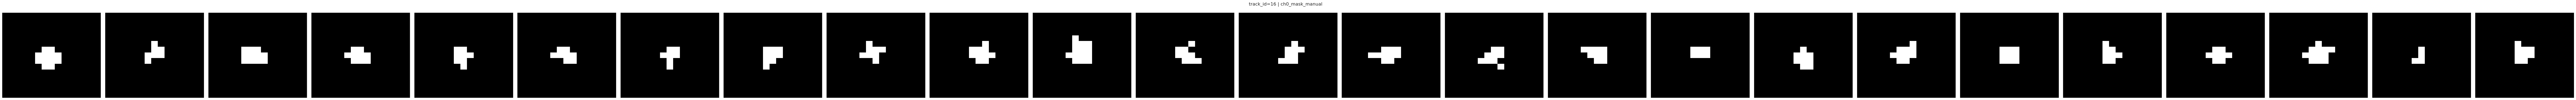

In [117]:
ta1.tplot.plot_trackarray_crops(layer="ch0_mask_manual",fov=0, track_id=[4,6,8,10,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

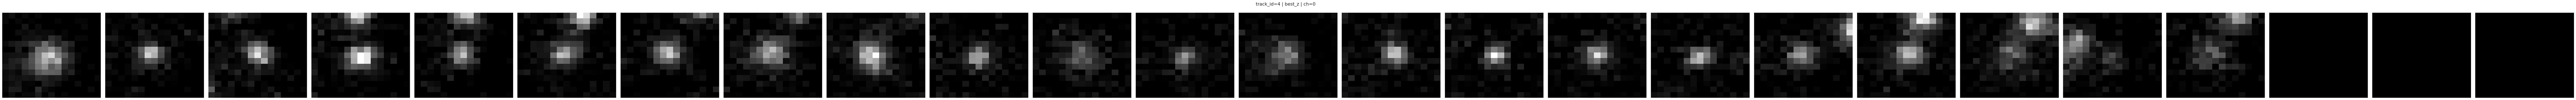

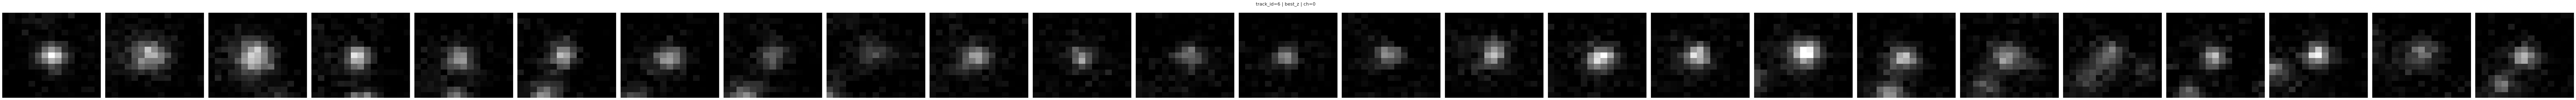

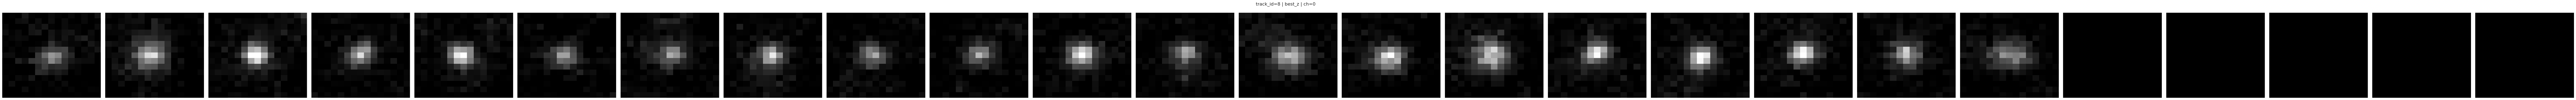

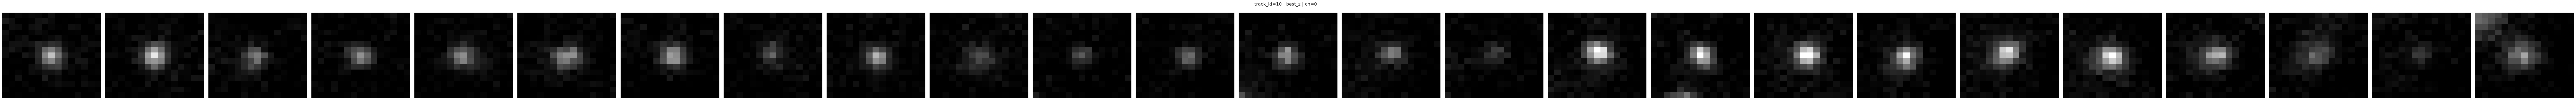

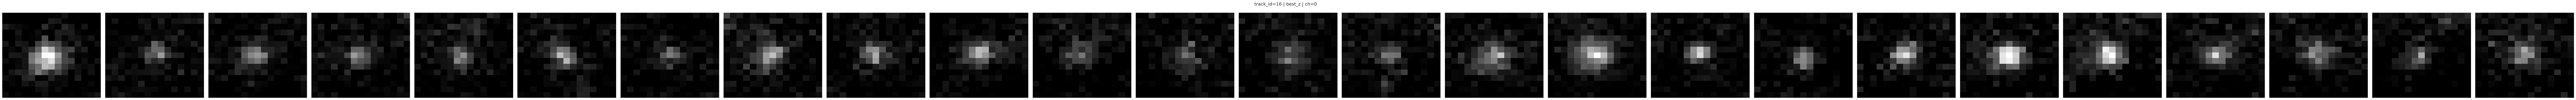

In [104]:
ta1.tplot.plot_trackarray_crops(fov=0, track_id=[4,6,8,10,16], t=(0, 250, 10), rolling=1, quantile_range=(0.02, 0.999));

In [15]:
import napari
viewer = napari.Viewer()
temp = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').best_z
temp_ch0 = ca.tools.montage(ta3, row = 'track_id', col = 'track_id').ch0_mask_manual
viewer.add_image(temp.sel(ch=0), colormap='red', name='TRNL', blending='additive', contrast_limits=[0,temp.sel(ch=0).fillna(0).data.max()])
viewer.add_image(temp_ch0, colormap='yellow', name='ch_spots', blending='additive', contrast_limits=[0,temp_ch0.data.max()])

<Image layer 'ch_spots' at 0x7ac694045c00>